In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
# Dataset is large instead of uploading we can directly download it to colab.
# first download api from kaggle account,upload it to colab notebook. and then paste this link in notebook with ! mark 
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 165MB/s]
100% 1.06G/1.06G [00:07<00:00, 144MB/s]


In [9]:
# Dataset is downloaded in zip file we need to unzip files
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten

In [11]:
# generators for converting data to small batches 
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# normalize values from 0-255 to 0-1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
from keras.layers.pooling import MaxPool2D
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding="valid", activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3),padding="valid", activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 97ms/step - loss: 0.6342 - accuracy: 0.6402 - val_loss: 0.5363 - val_accuracy: 0.7328
Epoch 2/10
625/625 [==============================] - 60s 95ms/step - loss: 0.4953 - accuracy: 0.7551 - val_loss: 0.4830 - val_accuracy: 0.7760
Epoch 3/10
625/625 [==============================] - 62s 98ms/step - loss: 0.3952 - accuracy: 0.8166 - val_loss: 0.4752 - val_accuracy: 0.7898
Epoch 4/10
625/625 [==============================] - 60s 95ms/step - loss: 0.2685 - accuracy: 0.8828 - val_loss: 0.7024 - val_accuracy: 0.7890
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.1480 - accuracy: 0.9419 - val_loss: 0.7367 - val_accuracy: 0.7872
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 0.0862 - accuracy: 0.9714 - val_loss: 0.8328 - val_accuracy: 0.7728
Epoch 7/10
625/625 [==============================] - 60s 95ms/step - loss: 0.0567 - accuracy: 0.9803 - val_loss: 1.1840 - val_accuracy:

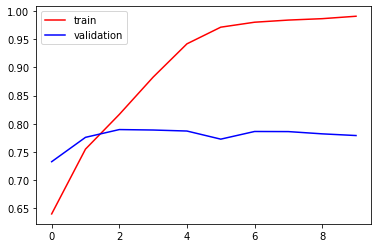

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

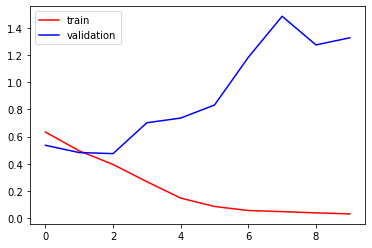

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [39]:
#prediction
import cv2

In [40]:
test_img = cv2.imread('/content/cat.jpg')

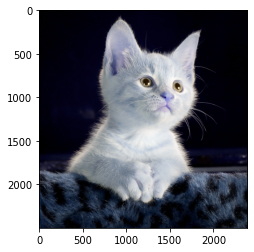

In [41]:
plt.imshow(test_img)

In [42]:
test_img.shape

(2500, 2392, 3)

In [43]:
test_img = cv2.resize(test_img,(256,256))

In [44]:
test_input = test_img.reshape((1,256,256,3))

In [45]:
model.predict(test_input)

array([[1.]], dtype=float32)

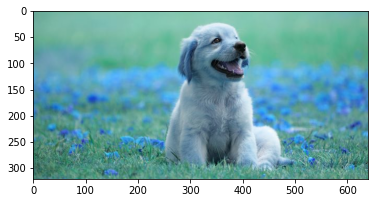

In [46]:
test_img1 = cv2.imread('/content/dog.jpg')
plt.imshow(test_img1)

In [47]:
test_img1 = cv2.resize(test_img1,(256,256))
test_input2 = test_img1.reshape((1,256,256,3))
model.predict(test_input2)

array([[0.]], dtype=float32)